In [64]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
df = pd.read_csv("spam.csv",delimiter=',', encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ã_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [65]:
df1 = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)
df1

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [66]:
df1.isnull().sum()

v1    0
v2    0
dtype: int64

<AxesSubplot:xlabel='v1', ylabel='count'>

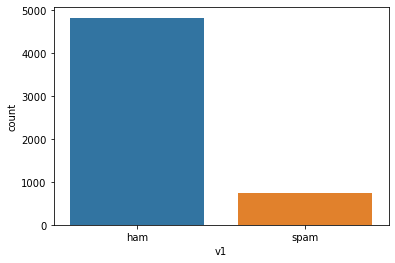

In [67]:
sns.countplot(x=df1["v1"])

In [68]:
x = df1['v2']
y = df1['v1']

In [69]:
from sklearn.preprocessing import LabelEncoder
lb_enc = LabelEncoder()
Y= lb_enc.fit_transform(y)
Y

array([0, 0, 1, ..., 0, 0, 0])

In [70]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [71]:
Y_new=Y[:,np.newaxis]
Y_new

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [72]:
x.shape

(5572,)

In [73]:
X_train, X_test,y_train,y_test = train_test_split( x,Y_new , test_size=0.20, random_state=10)

In [74]:
Y_new.shape

(5572, 1)

In [75]:
tokenizer = Tokenizer(num_words=1000) 
tokenizer.fit_on_texts(X_train)
text_to_sequence = tokenizer.texts_to_sequences(X_train)
text_to_sequence

[[7, 48, 3, 31, 27, 19, 393],
 [407, 33, 15, 454, 3, 196, 300, 20, 7, 3, 142, 196, 370, 13, 208, 73],
 [494, 81, 18, 552, 1, 64, 159, 56, 24, 63, 478, 408],
 [4, 291, 110, 599, 70, 218, 125, 1, 64, 56, 792, 931, 24, 70, 300, 675, 382],
 [72, 2, 95, 12, 166, 49],
 [15, 118, 423, 2, 27, 34, 5, 175, 65, 4, 24, 337, 111, 633, 14, 145],
 [46],
 [89, 82, 20, 3, 676, 10],
 [55, 15, 634, 13, 124, 46],
 [225, 90],
 [65, 793, 2, 579, 240, 58, 39, 52, 28, 146, 24, 112, 199, 635, 176, 2, 10],
 [225, 677, 87, 10, 48, 1, 599, 32, 25, 30, 77, 8, 84, 600, 141],
 [553, 55, 4, 22, 65, 42, 66],
 [1, 349, 6, 107, 6, 862, 48, 286, 6, 80, 21, 10, 636, 6, 349, 6, 394],
 [2, 29, 177, 129],
 [9, 19, 53, 62, 3, 68, 10, 2, 57],
 [292, 253, 14, 6, 495, 141],
 [92,
  3,
  54,
  39,
  9,
  5,
  678,
  62,
  102,
  118,
  135,
  58,
  19,
  23,
  175,
  1,
  14,
  53,
  102,
  338,
  7,
  121,
  5,
  61,
  199,
  26,
  33,
  176,
  5,
  61,
  199,
  23,
  19,
  40,
  28,
  29,
  182,
  65,
  337],
 [932, 9, 39, 12, 

In [76]:
tokenizer = Tokenizer(num_words=1000) #initializing the tokenizer
tokenizer.fit_on_texts(X_test)# fitting on the sms data
text_sequence = tokenizer.texts_to_sequences(X_test)
text_sequence

[[101, 101, 255, 143, 14, 224],
 [71, 65, 15, 100, 10, 240],
 [317,
  351,
  481,
  2,
  112,
  5,
  19,
  4,
  20,
  407,
  57,
  19,
  24,
  185,
  7,
  726,
  24,
  727,
  280,
  318,
  4,
  728,
  256,
  8,
  108,
  2],
 [128, 135, 257],
 [1, 258, 482, 113, 11, 98, 2, 152, 581, 6],
 [31, 3, 109, 13, 259, 38, 32, 3, 72, 2, 29, 166, 114],
 [115, 20, 408, 42, 4, 483, 2],
 [116,
  582,
  729,
  2,
  123,
  41,
  409,
  352,
  27,
  3,
  730,
  92,
  47,
  2,
  353,
  144,
  145,
  260,
  197,
  583,
  584,
  241,
  281],
 [225, 731, 3, 410, 5, 411, 43, 36],
 [136, 412, 1, 72, 2, 92, 3, 242, 110, 14, 319, 8, 11],
 [115, 153, 69, 2, 109, 77],
 [261, 282, 211, 283, 484, 111, 146, 1, 226, 732, 85],
 [320, 35],
 [71,
  1,
  21,
  59,
  117,
  24,
  137,
  485,
  66,
  30,
  733,
  227,
  26,
  73,
  63,
  99,
  110,
  413,
  16,
  4,
  93,
  414,
  17,
  243,
  10],
 [1, 72, 2, 14, 21],
 [136, 29, 585, 284, 262, 19, 86, 1, 60, 13],
 [228, 33, 154, 32, 13, 1, 226, 285, 150, 244, 4, 354],
 [1

In [77]:
X_train_pad = pad_sequences(text_to_sequence, maxlen=150)
X_train_pad

array([[  0,   0,   0, ...,  27,  19, 393],
       [  0,   0,   0, ...,  13, 208,  73],
       [  0,   0,   0, ...,  63, 478, 408],
       ...,
       [  0,   0,   0, ...,   0, 232,  18],
       [  0,   0,   0, ..., 310, 405, 164],
       [  0,   0,   0, ...,  76, 280, 257]])

In [78]:
X_test_pad = pad_sequences(text_sequence, maxlen=150)
X_test_pad

array([[  0,   0,   0, ..., 143,  14, 224],
       [  0,   0,   0, ..., 100,  10, 240],
       [  0,   0,   0, ...,   8, 108,   2],
       ...,
       [  0,   0,   0, ..., 642,   1,   5],
       [  0,   0,   0, ..., 124,   3,  22],
       [  0,   0,   0, ...,   0,   0,  54]])

In [79]:
max_words = 1000
max_len = 150
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [54]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_2 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257 

In [80]:
model.fit(X_train_pad,y_train,batch_size=32,epochs=20,validation_split=0.2,
          callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/20
112/112 [==============================] - 8s 76ms/step - loss: 0.1776 - accuracy: 0.9433 - val_loss: 0.1105 - val_accuracy: 0.9686
Epoch 2/20
112/112 [==============================] - 9s 76ms/step - loss: 0.0758 - accuracy: 0.9767 - val_loss: 0.0845 - val_accuracy: 0.9798


In [81]:
accr = model.evaluate(X_test_pad,y_test)
accr

35/35 [==============================] - 1s 27ms/step - loss: 0.6045 - accuracy: 0.8691


[0.6044964790344238, 0.8690583109855652]

In [82]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.604
  Accuracy: 0.869
